In [1]:
import pandas as pd
import numpy as np

In [2]:
"""
행렬 분해 => 추천시스템
"""

'\n행렬 분해 => 추천시스템\n'

In [3]:
ratingData=pd.read_csv("C:/Users/김경한/movielens-small/ratings.csv")

In [4]:
movieData=pd.read_csv("C:/Users/김경한/movielens-small/movies.csv")

In [5]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
ratingData.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]>

In [10]:
ratingData.shape

(100004, 4)

In [11]:
movieData.shape

(9125, 3)

In [ ]:
ratingData #사용자 id-영화 id-평점
movieData #영화 id-제목-장르


In [8]:
ratingData.drop('timestamp',axis=1,inplace=True)

In [9]:
ratingData

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [10]:
movieData.drop('genres',axis=1,inplace=True)

In [11]:
movieData

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9120,162672,Mohenjo Daro (2016)
9121,163056,Shin Godzilla (2016)
9122,163949,The Beatles: Eight Days a Week - The Touring Y...
9123,164977,The Gay Desperado (1936)


In [ ]:
ratingData, movieData를 병합(merge)
# userid |movied|rating title
# 1       31
# 10      31

In [12]:
user_movie_data=pd.merge(ratingData,movieData,on='movieId')

In [13]:
user_movie_data

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)
...,...,...,...,...
99999,664,64997,2.5,War of the Worlds (2005)
100000,664,72380,3.5,"Box, The (2009)"
100001,665,129,3.0,Pie in the Sky (1996)
100002,665,4736,1.0,Summer Catch (2001)


In [ ]:
#데이터: rating, 행:userid. 열: title 

In [14]:
user_movie_rating=user_movie_data.pivot_table('rating',
                                              index='userId',
                                             columns='title').fillna(0)

In [15]:
#사용자-영화
user_movie_rating.shape

(671, 9064)

In [16]:
movies_user_rating=user_movie_rating.T
movies_user_rating.shape

(9064, 671)

In [ ]:
######SVD######
#(9064, 671) => (9064,12)
#truncated SVD을 이용하여 시그마행렬의 
#대각원소(특이값) 가운데 상위 n(12)개 선택
#기존 A행렬을 100% 원상복구는 못하지만
#상당히 유사하게는 나오게 됨

In [17]:
SVD=TruncatedSVD(n_components=12)
mat=SVD.fit_transform(movies_user_rating)
mat.shape

(9064, 12)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

(9064, 9064)


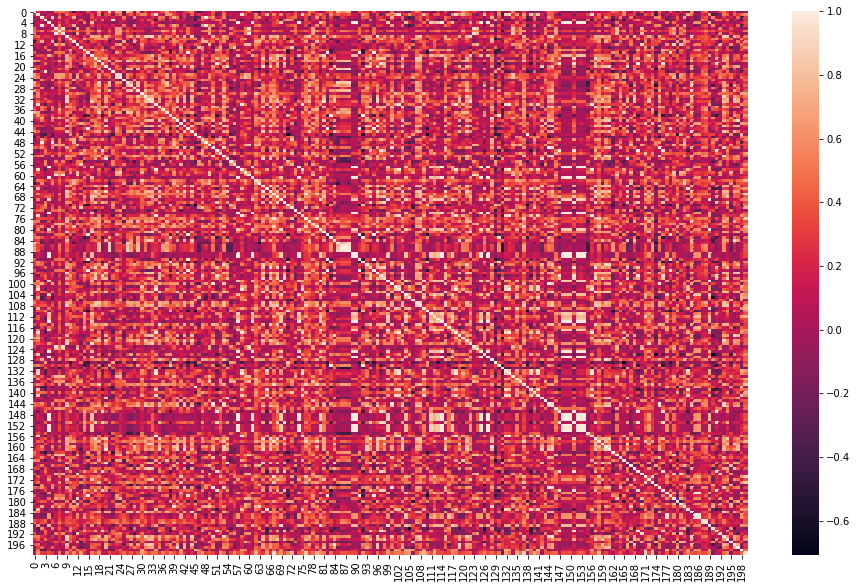

In [21]:
corr=np.corrcoef(mat) # 피어슨 상관계수
print(corr.shape)
corr2=corr[:200,:200]
plt.figure(figsize=(16,10))
sns.heatmap(corr2)

In [23]:
movie_title=user_movie_rating.columns
movie_title_list=list(movie_title)
coffey_hands=movie_title_list.index("Guardians of the Galaxy (2014)")
corr_cf=corr[coffey_hands]
list(movie_title[corr_cf>=0.9])[:50]
#하나의 영화에 대해 비슷한 영화를 추천


['10,000 BC (2008)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)',
 'Angels & Demons (2009)',
 'Ant-Man (2015)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Batman: The Dark Knight Returns, Part 1 (2012)',
 'Batman: The Dark Knight Returns, Part 2 (2013)',
 'Battle: Los Angeles (2011)',
 'Bee Movie (2007)',
 'Beowulf (2007)',
 'Big Hero 6 (2014)',
 'Bolt (2008)',
 'Brave (2012)',
 'Captain America: Civil War (2016)',
 'Captain America: The First Avenger (2011)',
 'Captain America: The Winter Soldier (2014)',
 'Chronicle (2012)',
 'Click (2006)',
 'Cloverfield (2008)',
 'Cop Out (2010)',
 'Dark Knight Rises, The (2012)',
 'Diary of a Wimpy Kid (2010)',
 'District 9 (2009)',
 'Dredd (2012)',
 'Drillbit Taylor (2008)',
 'Déjà Vu (Deja Vu) (2006)',
 'Edge of Tomor